# JupyterLab Demos

- Demo 1: Uploading Data to the platform via JupyterLab
- Demo 2: Connecting to available databases on the data science platform
- Demo 3: Extracting your output from the platform


## Demo 1: Upload & Use Dataset


#### Step 1: Download CSV file from https://www.uktradeinfo.com/Statistics/Pages/DataDownloads.aspx -> Current month -> Traders Files -> Importers

To upload data you need to ensure it is stored somewhere. I.e. you can find it via file explorer, this includes sharepoint, onedrive and your local pc. For our demo we download data from the hmrc website and store it on our local machines. 

<img src="/templates/demo1s1.png" alt="Drawing" style="width: 600px;" align="center"/>

#### Step 2: Unzip the CSV

#### Step 3: Create data Folder (/data) & Step 4: Upload CSV in data folder

After logging in to the platform via this link: https://data.trade.gov.uk/, the screen below should appear in your browser. On the far left it shows whatever files/folders you already have saved in your personal workspace. If you don't see this screen you should be able to click on the file browser tab.

You can either upload a file straight into here or create a folder to store it in. We create a folder called ‘data’ to store it in.
To do this click the button to create an untitled folder, this can easily be renamed by right clicking and selecting rename. Next you can navigate to the folder and upload the CSV from step 2 using the upload button.

<img src="/templates/demo1s3-4.png" alt="Drawing" style="width: 600px;" align="center"/>

#### Step 4: Load dataset in Dataframe


In [2]:
import pandas as pd 

df = pd.read_csv('data/importers1906..txt', sep='\t', header=-1, error_bad_lines=False, warn_bad_lines=False)

#### Step 5: Check results

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,201906,1,MARK PRICE TEXTILES,''TWO HOOTS'',MELTON ROAD,HICKLING PASTURES,LEICESTER,NaN,LE14 3QG,58064000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201906,1,PETER GRAHAM WHITEHEAD,'A' HANGAR,SLEAP AIRFIELD,HARMER HILL,SHREWSBURY,NaN,SY4 3HE,84812010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201906,1,F D COPELAND & SONS LTD,'COLANOL HOUSE',5 WESTFIELD STREET,WOOLWICH,LONDON,NaN,SE18 5TL,29052990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201906,1,FESTIVE PRODUCTIONS LTD,'OTTERS BROOK',TY COCH WAY,CWMBRAN,NaN,NaN,NP44 7XE,39199080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201906,1,MAHALINGAM PARTHIPAN,04 BEFORD ROAD,EASTHAM,LONDON,NaN,NaN,E6 2NN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Demo 2: Connect to the database

Many of the datasets are very large. To avoid overloading the notebook's memory it is adviced to filter the data on the database level instead of loading everything in the notebooks and then manipulating the data. To do this filters, limit,  aggregation, etc can be used in SQL.

#### Step 1: Connect to database

To start working with the DB, a database connection string needs to be loaded. This can be done by clicking the DB icon in JupyterHub.  
    
<img src="/templates/demo3s1.png" alt="Drawing" style="width: 800px;"/>

#### Step 2: Check connection 

The connection strings you have permissions for will shown in the output.
        

In [5]:
from os import environ as __environ
from collections import namedtuple as __namedtuple
from psycopg2 import connect as __connect
__dsns = dict((key.split("__")[1], __connect(value)) for (key, value) in __environ.items() if key.startswith("DATABASE_DSN__"))
conn = __namedtuple("Connections", __dsns.keys())(**__dsns)
print("You now have {} database connection{}:".format(len(__dsns.keys()), "s" if len(__dsns.keys()) > 1 else ""))
for key in __dsns.keys():
  print(f"  conn.{key}")
del __dsns
del __environ
del __namedtuple
del __connect

You now have 1 database connection:
  conn.datasets_1


#### Step 3: Retrieve data from the DB using SQL

##### Step 3.1: Get all available tables

In a database, tables are organised within schemas. A database may have one or more schemas, and each one of these may have many tables. In PostgreSQL, the default schema is called 'public', and we will use it in the following examples.

In [6]:
cur = conn.datasets_1.cursor()
cur.execute('''
     SELECT schemaname, tablename 
     FROM pg_catalog.pg_tables
     WHERE schemaname != all(array['pg_catalog', 'information_schema']);
''')
rows = cur.fetchall()
rows

[('ons.gdp_components.monthly', 'L1'),
 ('hmrc.smke19', 'L1'),
 ('companies_house.accounts', 'L1'),
 ('ons.trade_in_goods.part_2', 'L1'),
 ('ons.uk_economic_accounts.part_1.monthly', 'L1'),
 ('ons.uk_economic_accounts.part_4.quarterly', 'L1'),
 ('hmrc.smki19', 'L1'),
 ('ons.uk_economic_accounts.part_2.monthly', 'L1'),
 ('ons.uk_economic_accounts.part_3.yearly', 'L1'),
 ('ons', 'dictionary'),
 ('ons.national_accounts.monthly', 'L1'),
 ('ons.uk_economic_accounts.part_4.yearly', 'L1'),
 ('unctad.fdi.inward_flow_usd', 'L1'),
 ('ons.uk_economic_accounts.part_3.monthly', 'L1'),
 ('ons.uk_economic_accounts.part_5.quarterly', 'L1'),
 ('ons.uk_economic_accounts.part_6', 'L1'),
 ('ons.national_accounts.quarterly', 'L1'),
 ('ons.pink_book.part_4.yearly', 'L1'),
 ('ons.pink_book.part_2', 'L1'),
 ('ons.uk_economic_accounts.part_2.yearly', 'L1'),
 ('ons.pink_book.part_4', 'L1'),
 ('ons.trade_in_goods.part_1.quarterly', 'L1'),
 ('ons.uk_economic_accounts.part_1.quarterly', 'L1'),
 ('ons.uk_economic_a

##### Step 3.2: Check columns of a table

In [7]:
cur.execute('''
    SELECT column_name, data_type
    FROM information_schema.columns 
    WHERE table_schema = 'oecd.tiva'    
    AND table_name = 'L1';
''')
rows = cur.fetchall()
rows

[('source_country', 'character varying'),
 ('source_industry', 'character varying'),
 ('exporting_country', 'character varying'),
 ('exporting_industry', 'character varying'),
 ('value', 'real'),
 ('source_country_eu', 'boolean'),
 ('exporting_country_eu', 'boolean'),
 ('value_world', 'real'),
 ('year', 'character varying'),
 ('id', 'integer')]

##### Step 3.3.: Checkout a few rows in a table

When a query is executed, the data will be stored in memory. Many datasets have more data then is suitable to load into memory. Loading all data in this case will crash JupyterHub. You can limit the number of results to retrieve in manageable chunck by using the LIMIT and OFFSET functionality.

In [8]:
cur.execute('''
    SELECT *
     FROM "oecd.tiva"."L1"
     LIMIT 10;
''')
rows = cur.fetchall()
[print(row) for row in rows]

('Croatia', 'C60T63', 'Norway', 'C28', 0.023, True, False, 26.248, '2004', 33336480)
('Indonesia', 'C60T63', 'Norway', 'C28', 0.01, False, False, 26.248, '2004', 33336481)
('India', 'C60T63', 'Norway', 'C28', 0.074, False, False, 26.248, '2004', 33336482)
('Cambodia', 'C60T63', 'Norway', 'C28', 0.001, False, False, 26.248, '2004', 33336483)
('Lithuania', 'C60T63', 'Norway', 'C28', 0.055, True, False, 26.248, '2004', 33336484)
('Malta', 'C60T63', 'Norway', 'C28', 0.008, True, False, 26.248, '2004', 33336485)
('Malaysia', 'C60T63', 'Norway', 'C28', 0.058, False, False, 26.248, '2004', 33336486)
('Morocco', 'C60T63', 'Norway', 'C28', 0.02, False, False, 26.248, '2004', 33336487)
('Peru', 'C60T63', 'Norway', 'C28', 0.019, False, False, 26.248, '2004', 33336488)
('Philippines', 'C60T63', 'Norway', 'C28', 0.005, False, False, 26.248, '2004', 33336489)


[None, None, None, None, None, None, None, None, None, None]

##### Step 3.4: Checkout specific columns in a table


In [9]:
cur.execute('''
    SELECT year, source_country, exporting_country, value_world  
     FROM "oecd.tiva"."L1"
     LIMIT 10;
''')
rows = cur.fetchall()
[print(row) for row in rows]

('2004', 'Croatia', 'Norway', 26.248)
('2004', 'Indonesia', 'Norway', 26.248)
('2004', 'India', 'Norway', 26.248)
('2004', 'Cambodia', 'Norway', 26.248)
('2004', 'Lithuania', 'Norway', 26.248)
('2004', 'Malta', 'Norway', 26.248)
('2004', 'Malaysia', 'Norway', 26.248)
('2004', 'Morocco', 'Norway', 26.248)
('2004', 'Peru', 'Norway', 26.248)
('2004', 'Philippines', 'Norway', 26.248)


[None, None, None, None, None, None, None, None, None, None]

##### Step 3.5: Count results

In [10]:
cur.execute('''
    SELECT count(*) as total_rows,
    count(distinct(source_country)) as number_countries
    FROM "oecd.tiva"."L1";
''')
rows = cur.fetchall()
rows

[(55430983, 65)]

##### Step 3.6: Filtering results (WHERE)

In [11]:
cur.execute('''
    SELECT year, source_country, exporting_country, value_world  
    FROM "oecd.tiva"."L1"
    WHERE exporting_country = 'United Kingdom' LIMIT 10;
''')
cur.description

(Column(name='year', type_code=1043, display_size=None, internal_size=-1, precision=None, scale=None, null_ok=None),
 Column(name='source_country', type_code=1043, display_size=None, internal_size=255, precision=None, scale=None, null_ok=None),
 Column(name='exporting_country', type_code=1043, display_size=None, internal_size=255, precision=None, scale=None, null_ok=None),
 Column(name='value_world', type_code=700, display_size=None, internal_size=4, precision=None, scale=None, null_ok=None))

In [12]:
rows = cur.fetchall()
[print(row) for row in rows]

('1997', 'Australia', 'United Kingdom', 357.234)
('1997', 'Austria', 'United Kingdom', 357.234)
('1997', 'Belgium', 'United Kingdom', 357.234)
('1997', 'Australia', 'United Kingdom', 78.742)
('1997', 'Austria', 'United Kingdom', 78.742)
('1997', 'Australia', 'United Kingdom', 30.144)
('1997', 'Austria', 'United Kingdom', 30.144)
('1997', 'Belgium', 'United Kingdom', 30.144)
('1997', 'Australia', 'United Kingdom', 26.65)
('1997', 'Australia', 'United Kingdom', 303.863)


[None, None, None, None, None, None, None, None, None, None]

##### Step 3.7: Aggregating results (GROUP BY)

In [14]:
cur.execute('''
    SELECT source_country, 
    sum(value_world) as total_value, avg(value_world) as average_value, count(value_world) as number_rows  
     FROM "oecd.tiva"."L1"
     WHERE exporting_country = 'United Kingdom'
     GROUP BY source_country
     LIMIT 10;
''')
rows = cur.fetchall()
[print(row) for row in rows]

('Argentina', 67806300.0, 4196.97791127401, 16156)
('Australia', 67872000.0, 3863.83616739977, 17566)
('Austria', 67869600.0, 3865.90369785533, 17556)
('Belgium', 67872500.0, 3850.93916037116, 17625)
('Brazil', 67867300.0, 3920.70062874368, 17310)
('Brunei', 64977400.0, 8740.56699863526, 7434)
('Bulgaria', 67780000.0, 4323.80391282818, 15676)
('Cambodia', 66006800.0, 7594.85450705648, 8691)
('Canada', 67873200.0, 3851.84321125545, 17621)
('Chile', 67838600.0, 4184.46784009219, 16212)


[None, None, None, None, None, None, None, None, None, None]

##### Step 3.8: Ordering results (ORDER BY)

In [13]:
cur.execute('''
    SELECT source_country, 
      sum(value) as total_value, 
      avg(value) as average_value,
      count(value) as number_rows  
     FROM "oecd.tiva"."L1"
     WHERE exporting_country = 'United Kingdom'
     GROUP BY source_country
     ORDER BY sum(value) desc
     LIMIT 8;
''')
rows = cur.fetchall()
[print(row) for row in rows]

('World', 67873300.0, 3843.342555183, 17660)
('United Kingdom', 55210600.0, 3126.31901008102, 17660)
('United States', 1706020.0, 96.6694643175205, 17648)
('Germany', 1578450.0, 89.4408756189047, 17648)
('France', 929635.0, 52.6764776821893, 17648)
('Norway', 859274.0, 48.8530137042344, 17589)
('Rest of world', 727219.0, 41.2771693318509, 17618)
('Japan', 595814.0, 33.7916924684029, 17632)


[None, None, None, None, None, None, None, None]

#### Step 4: Plot results

##### Step 4.1: Query DB

In [15]:
import pandas as pd

cur.execute('''
    SELECT exporting_country, source_country, sum(value) 
    from "oecd.tiva"."L1" where year='2011' 
        and source_country='United Kingdom' 
        and exporting_country_eu='True' and exporting_country != 'United Kingdom' 
    group by exporting_country, source_country
''')
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['exporting_country', 'source_country', 'year'])
df = df.set_index('exporting_country')
df.head()

,source_country,year
exporting_country,,
Malta,United Kingdom,2333.70
Estonia,United Kingdom,1436.44
Austria,United Kingdom,10899.30
Sweden,United Kingdom,37097.00
Czech Republic,United Kingdom,16900.50


##### Step 4.2: Plotting results 

Step 4.2.1: Basic bar chart

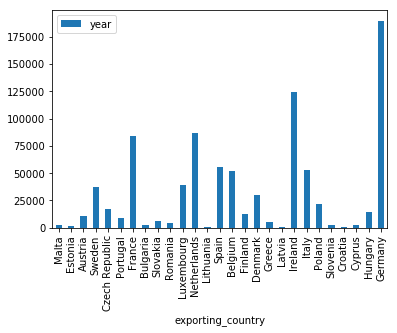

In [17]:
df.plot.bar()

##### Step 4.2.2: Seaborn chart

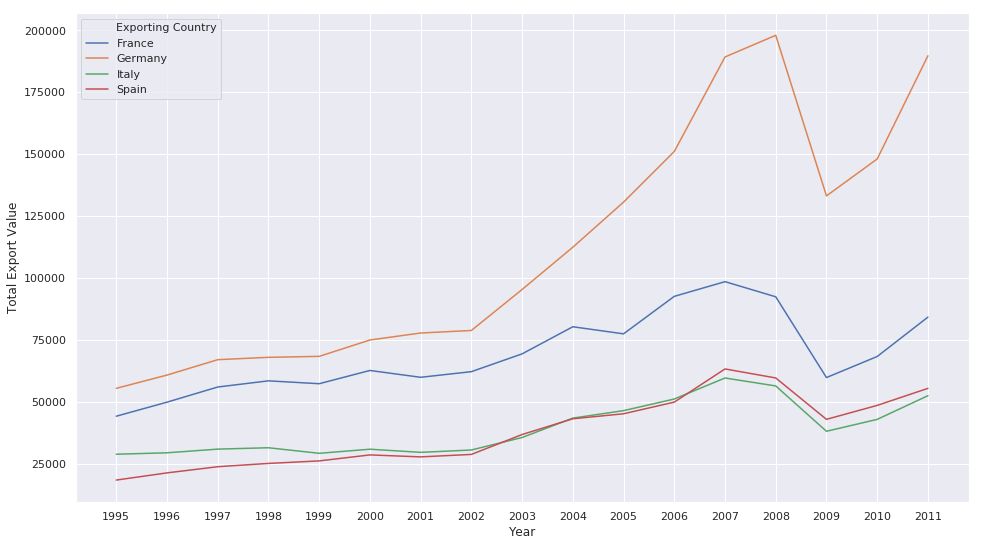

In [12]:
import pandas as pd
import seaborn as snb
snb.set(rc={'figure.figsize':(16,9)})

cur.execute('''
    SELECT exporting_country, year, sum(value) as total_export_value 
    from "oecd.tiva"."L1"
    where year > '1990' 
    and exporting_country = any('{France, Germany, Italy, Spain}')
    and source_country = 'United Kingdom'
    group by exporting_country, year
    order by year
''')
rows = cur.fetchall()
df = pd.DataFrame(rows, columns=['Exporting Country', 'Year', 'Total Export Value'])
ax = snb.lineplot(x="Year", y="Total Export Value", hue="Exporting Country", data=df)

## Demo 3: Export data to local machine

#### Step 1: Modify dataframe to exclude empty columns 

This demo starts from the dataframe with HMRC exporter data created in demo 1 and explains how work can be exported outside JupyterHub to your local machine.

In [3]:
df_modified = df.iloc[:,0:10]
df_modified.head()

,0,1,2,3,4,5,6,7,8,9
0,201906,1,MARK PRICE TEXTILES,''TWO HOOTS'',MELTON ROAD,HICKLING PASTURES,LEICESTER,NaN,LE14 3QG,58064000
1,201906,1,PETER GRAHAM WHITEHEAD,'A' HANGAR,SLEAP AIRFIELD,HARMER HILL,SHREWSBURY,NaN,SY4 3HE,84812010
2,201906,1,F D COPELAND & SONS LTD,'COLANOL HOUSE',5 WESTFIELD STREET,WOOLWICH,LONDON,NaN,SE18 5TL,29052990
3,201906,1,FESTIVE PRODUCTIONS LTD,'OTTERS BROOK',TY COCH WAY,CWMBRAN,NaN,NaN,NP44 7XE,39199080
4,201906,1,MAHALINGAM PARTHIPAN,04 BEFORD ROAD,EASTHAM,LONDON,NaN,NaN,E6 2NN,3


#### Step 2: Save Dataframe to S3 as CSV

In [4]:
import pandas as pd 

csv = df_modified.to_csv('data/importers_mod.txt', index=False)


#### Step 3: Download CSV to Local machine 

<img src="/templates/demo2s9.png" alt="Drawing" style="width: 400px;"/>

#### Step 4: Check result

<img src="/templates/demo2s10.png" alt="Drawing" style="width: 800px;"/>